# Analyse HBN behavioral data

In [1]:
# import
import numpy as np
import pandas as pd
import glob
import os
from scipy import stats
from os.path import exists
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Define paths:
projectdir = '/scratch/groups/jyeatman/HBN_FC/'
space = 'volume' # volume or surface analysis
datadir = projectdir + space + '/statMaps/'
analysesdir = projectdir + space + '/analyses/'
inputdir = projectdir + 'input/'
task = 'rest'

# Load subject list
subject_file = projectdir+ 'subs_preprocessed_restingstate_movieDM_meanFD05_SNR15_FD05_90_WIAT_FilteredAfterScrubbing_0.5_0.2.csv'
if task == 'rest':
    subject_file = projectdir+ 'subs_preprocessed_onlyrest_meanFD05_SNR15_FD05_90_WIAT.csv'
elif task == 'movie':
    subject_file = projectdir+ 'subs_preprocessed_onlymovie_meanFD05_SNR15_FD05_90_WIAT.csv'
sub_data = pd.read_csv(subject_file)
subs = sub_data['participant_id']

In [3]:
sub_data.columns

Index(['Unnamed: 0', 'X', 'participant_id', 'preproc', 'existsRun1',
       'existsRun2', 'existsMovieDM', 'existsMovieTP', 'medianFD_run1',
       'meanFD_run1', 'maxFD_run1', 'stdFD_run1', 'FD05_run1', 'SNR_run1',
       'medianFD_run2', 'meanFD_run2', 'maxFD_run2', 'stdFD_run2', 'FD05_run2',
       'SNR_run2', 'medianFD_movieDM', 'meanFD_movieDM', 'maxFD_movieDM',
       'stdFD_movieDM', 'FD05_movieDM', 'SNR_movieDM', 'medianFD_movieTP',
       'meanFD_movieTP', 'maxFD_movieTP', 'stdFD_movieTP', 'FD05_movieTP',
       'SNR_movieTP', 'meanFD_avg', 'maxFS_avg', 'SNR_avg', 'release_number',
       'Bold.Sequence', 'Sex', 'Age', 'EHQ_Total', 'Commercial_Use',
       'Full_Pheno', 'site', 'Gender', 'WIAT_Word_Raw', 'WIAT_Word_Stnd',
       'WIAT_Num_Raw', 'WIAT_Num_Stnd', 'WIAT_Pseudo_Raw', 'WIAT_Pseudo_Stnd',
       'WIAT_MP_Raw', 'WIAT_MP_Stnd', 'Barratt_P1_Edu', 'Barratt_P2_Edu',
       'Barratt_Total_Edu', 'Barratt_P1_Occ', 'Barratt_P2_Occ',
       'Barratt_Total_Occ', 'Barratt_Total

In [4]:
# Create smaller dataframe for visualizations
my_data = sub_data[['participant_id','Sex', 'Age', 'EHQ_Total', 'site', 'Gender',
                    'WIAT_Word_Raw', 'WIAT_Word_Stnd',
                   'WIAT_Num_Raw', 'WIAT_Num_Stnd', 'WIAT_Pseudo_Raw', 'WIAT_Pseudo_Stnd',
                   'WIAT_MP_Raw', 'WIAT_MP_Stnd', 'Barratt_P1_Edu', 'Barratt_P2_Edu',
                   'Barratt_Total_Edu', 'Barratt_P1_Occ', 'Barratt_P2_Occ',
                   'Barratt_Total_Occ', 'Barratt_Total', 'TOWRE_PDE_Raw',
                   'TOWRE_PDE_Scaled', 'TOWRE_SWE_Raw', 'TOWRE_SWE_Scaled',
                   'TOWRE_Total_Scaled']]

In [37]:
# Load in diagnosis information
# read the csv file with diagnosis
diagn = pd.read_csv(projectdir + '9994_ConsensusDx_20220615.csv', header=0)
diagn = diagn.iloc[1:]
print('Number of rows: ' + str(len(diagn)))


# get overall number of sj
sj_list = np.unique(diagn.EID)
print('Number of unique subjects: ' + str(len(sj_list)))

# delete the duplicates
diagn_norep = diagn.drop_duplicates().reset_index()
print('Number of unique rows: ' + str(len(diagn_norep)))

Number of rows: 6182
Number of unique subjects: 3615
Number of unique rows: 3974


/tmp/ipykernel_32433/3591124527.py:3: DtypeWarning: Columns (3,7,8,10,16,17,18,19,20,21,22,23,24,25,31,32,33,34,35,36,37,38,39,40,46,47,48,49,50,51,52,53,54,55,61,62,63,64,65,66,67,68,69,70,76,77,78,79,80,81,82,83,84,85,91,92,93,94,95,96,97,98,99,100,106,107,108,109,110,111,112,113,114,115,121,122,123,124,125,126,127,128,129,130,136,137,138,139,140,141,142,143,144,145,147,149,151,152,153,154,155,156,157,158,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  diagn = pd.read_csv(projectdir + '9994_ConsensusDx_20220615.csv', header=0)


In [38]:
diagn_norep[diagn_norep.duplicated(subset='EID',keep=False)]

,index,Anonymized ID,Subject Type,Visit,Days since enrollment,EID,START_DATE,Study,Site,Year,Season,NoDX,DX_01_Cat,DX_01_Sub,DX_01,DX_01_Spec,DX_01_Code,DX_01_Time,DX_01_Confirmed,DX_01_Presum,DX_01_RC,DX_01_RuleOut,DX_01_ByHx,DX_01_New,DX_01_Rem,DX_01_PRem,DX_01_Past_Doc,DX_02_Cat,DX_02_Sub,DX_02,DX_02_Spec,DX_02_Code,DX_02_Time,DX_02_Confirmed,DX_02_Presum,DX_02_RC,DX_02_RuleOut,DX_02_ByHx,DX_02_New,DX_02_Rem,DX_02_PRem,DX_02_Past_Doc,DX_03_Cat,DX_03_Sub,DX_03,DX_03_Spec,DX_03_Code,DX_03_Time,DX_03_Confirmed,DX_03_Presum,DX_03_RC,DX_03_RuleOut,DX_03_ByHx,DX_03_New,DX_03_Rem,DX_03_PRem,DX_03_Past_Doc,DX_04_Cat,DX_04_Sub,DX_04,DX_04_Spec,DX_04_Code,DX_04_Time,DX_04_Confirmed,DX_04_Presum,DX_04_RC,DX_04_RuleOut,DX_04_ByHx,DX_04_New,DX_04_Rem,DX_04_PRem,DX_04_Past_Doc,DX_05_Cat,DX_05_Sub,DX_05,DX_05_Spec,DX_05_Code,DX_05_Time,DX_05_Confirmed,DX_05_Presum,DX_05_RC,DX_05_RuleOut,DX_05_ByHx,DX_05_New,DX_05_Rem,DX_05_PRem,DX_05_Past_Doc,DX_06_Cat,DX_06_Sub,DX_06,DX_06_Spec,DX_06_Code,DX_06_Time,DX_06_Confirmed,DX_06_Presum,DX_06_RC,DX_06_RuleOut,DX_06_ByHx,DX_06_New,DX_06_Rem,DX_06_PRem,DX_06_Past_Doc,DX_07_Cat,DX_07_Sub,DX_07,DX_07_Spec,DX_07_Code,DX_07_Time,DX_07_Confirmed,DX_07_Presum,DX_07_RC,DX_07_RuleOut,DX_07_ByHx,DX_07_New,DX_07_Rem,DX_07_PRem,DX_07_Past_Doc,DX_08_Cat,DX_08_Sub,DX_08,DX_08_Spec,DX_08_Code,DX_08_Time,DX_08_Confirmed,DX_08_Presum,DX_08_RC,DX_08_RuleOut,DX_08_ByHx,DX_08_New,DX_08_Rem,DX_08_PRem,DX_08_Past_Doc,DX_09_Cat,DX_09_Sub,DX_09,DX_09_Spec,DX_09_Code,DX_09_Time,DX_09_Confirmed,DX_09_Presum,DX_09_RC,DX_09_RuleOut,DX_09_ByHx,DX_09_New,DX_09_Rem,DX_09_PRem,DX_09_Past_Doc,DX_10_Cat,DX_10_Sub,DX_10,DX_10_Spec,DX_10_Code,DX_10_Time,DX_10_Confirmed,DX_10_Presum,DX_10_RC,DX_10_RuleOut,DX_10_ByHx,DX_10_New,DX_10_Rem,DX_10_PRem,DX_10_Past_Doc
3,7,A00078867,UNKNOWN,V1,0,NDARUW586LLL,1901-01-01T07:00:00Z,HBN,1,2016,Winter,2,Depressive Disorders,NaN,Major Depressive Disorder,Single episode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,A00078867,UNKNOWN,V1,0,NDARUW586LLL,1901-01-01T07:00:00Z,HBN,1,2016,Winter,2,Depressive Disorders,NaN,Major Depressive Disorder,"Single episode, Moderate",F32.1,1,NaN,NaN,0,0,0,1,0,0,NaN,Depressive Disorders,NaN,Persistent Depressive Disorder (Dysthymia),NaN,F34.1,1,NaN,NaN,0,0,0,1,0,0,NaN,Anxiety Disorders,NaN,Generalized Anxiety Disorder,NaN,F41.1,1,NaN,NaN,0,0,0,1,0,0,NaN,Neurodevelopmental Disorders,Attention-Deficit/Hyperactivity Disorder,ADHD-Inattentive Type,NaN,F90.0,1,NaN,NaN,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11,A00078869,UNKNOWN,V1,0,NDARNH263WZP,1901-01-01T07:00:00Z,HBN,1,2016,Winter,2,Depressive Disorders,NaN,Persistent Depressive Disorder (Dysthymia),NaN,F34.1,1,NaN,NaN,0,0,0,1,0,0,NaN,Substance Related and Addictive Disorders,Alcohol-Related,Alcohol Use Disorder,Moderate,F10.20,1,NaN,NaN,0,0,0,1,0,0,NaN,Depressive Disorders,NaN,Major Depressive Disorder,Single episode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [16]:
# to show all columns
pd.set_option('display.max_columns', 500)

In [39]:
# try to count how many nans in each row to decide which has more complete data
diagn_norep['sum_nans']= diagn_norep.isnull().sum(axis=1)
diagn_norep.sort_values(by=['EID','sum_nans'],inplace=True)

In [40]:
# get rid of duplicated rows and only keep rows with more complete info
diagn_norep[diagn_norep.duplicated(subset='EID',keep=False)]
diagn_norep.drop_duplicates(subset='EID',keep='last',inplace=True)

In [49]:
#df_codes = diagn_norep.filter(regex='DX_*_Code')
df_codes = diagn_norep.filter(like='_Code').copy()
df_codes['EID']=diagn_norep['EID']
df_codes

,DX_01_Code,DX_02_Code,DX_03_Code,DX_04_Code,DX_05_Code,DX_06_Code,DX_07_Code,DX_08_Code,DX_09_Code,DX_10_Code,EID
414,No Diagnosis Given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDARAA075AMK
662,F90.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDARAA112DMH
742,F90.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDARAA117NEJ
3528,NaN,NaN,NaN,NaN,NaN,NaN,F42,F63.3,NaN,NaN,NDARAA306NT2
1915,No Diagnosis Given: Incomplete Eval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDARAA358BPN
...,...,...,...,...,...,...,...,...,...,...,...
34,F84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDARZZ284ZDH
2295,F90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDARZZ740MLM
3784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDARZZ810LVF
2697,F42,F84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDARZZ830JM7


In [79]:
print(len(df_codes))
stacked = df_codes.filter(like="_Code").stack()
index = stacked.index.get_level_values(0)
result = pd.crosstab(index=index, columns=stacked)
result.index.name = None
result.columns.name = None
print(len(stacked))
print(len(index))
print(len(result))

3615
7292
7292
3414


In [77]:
result

,F02.80,F05,F06.32,F10.10,F10.20,F12.10,F12.20,F15.94,F17.200,F19.242,F19.94,F20.9,F28,F31.81,F31.89,F31.9,F32.0,F32.1,F32.2,F32.4,F32.5,F32.8,F32.9,F33.0,F33.1,F33.2,F33.3,F33.41,F33.42,F34.0,F34.1,F34.8,F40.0,F40.10,F40.218,F40.228,F40.230,F40.231,F40.232,F40.233,F40.248,F40.298,F41.0,F41.1,F41.8,F41.9,F42,F43.0,F43.10,F43.20,F43.21,F43.22,F43.23,F43.24,F43.25,F43.8,F44.4,F45.21,F45.22,F50.01,F50.2,F50.8,F51.4,F60.3,F63.3,F63.81,F64.1,F64.2,F70,F71,F72,F79,F80.0,F80.81,F80.89,F80.9,F81.0,F81.2,F81.81,F82,F84.0,F88,F89,F90.0,F90.1,F90.2,F90.8,F90.9,F91.1,F91.2,F91.3,F91.8,F91.9,F93.0,F94.0,F94.1,F95.0,F95.1,F95.2,F95.8,F95.9,F98.0,F98.1,F98.3,G47.00,G47.09,G47.419,L98.1,N39.498,No Diagnosis Given,No Diagnosis Given: Incomplete Eval,No ICD 10 Code,R41.83,Z62.820,Z62.891,Z72.0,Z91.19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [72]:
# syntax
items = ["EID"] + [f"DX_{idx:02d}" for idx in range(1, 11)]
df_dx = diagn_norep.filter(items=items).copy()
df_dx

,EID,DX_01,DX_02,DX_03,DX_04,DX_05,DX_06,DX_07,DX_08,DX_09,DX_10
414,NDARAA075AMK,No Diagnosis Given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,NDARAA112DMH,ADHD-Combined Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,NDARAA117NEJ,ADHD-Combined Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3528,NDARAA306NT2,Generalized Anxiety Disorder,Social Anxiety (Social Phobia),ADHD-Inattentive Type,Specific Learning Disorder with Impairment in ...,Specific Phobia,Language Disorder,Obsessive-Compulsive Disorder,Trichotillomania (Hair-Pulling Disorder),NaN,NaN
1915,NDARAA358BPN,No Diagnosis Given: Incomplete Eval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34,NDARZZ284ZDH,Autism Spectrum Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2295,NDARZZ740MLM,ADHD-Inattentive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3784,NDARZZ810LVF,Autism Spectrum Disorder,Language Disorder,Tourettes Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2697,NDARZZ830JM7,Obsessive-Compulsive Disorder,Autism Spectrum Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Look at a specific subject
diagn_norep[diagn_norep['EID']=='NDARAA306NT2']

,index,Anonymized ID,Subject Type,Visit,Days since enrollment,EID,START_DATE,Study,Site,Year,Season,NoDX,DX_01_Cat,DX_01_Sub,DX_01,DX_01_Spec,DX_01_Code,DX_01_Time,DX_01_Confirmed,DX_01_Presum,DX_01_RC,DX_01_RuleOut,DX_01_ByHx,DX_01_New,DX_01_Rem,DX_01_PRem,DX_01_Past_Doc,DX_02_Cat,DX_02_Sub,DX_02,DX_02_Spec,DX_02_Code,DX_02_Time,DX_02_Confirmed,DX_02_Presum,DX_02_RC,DX_02_RuleOut,DX_02_ByHx,DX_02_New,DX_02_Rem,DX_02_PRem,DX_02_Past_Doc,DX_03_Cat,DX_03_Sub,DX_03,DX_03_Spec,DX_03_Code,DX_03_Time,DX_03_Confirmed,DX_03_Presum,DX_03_RC,DX_03_RuleOut,DX_03_ByHx,DX_03_New,DX_03_Rem,DX_03_PRem,DX_03_Past_Doc,DX_04_Cat,DX_04_Sub,DX_04,DX_04_Spec,DX_04_Code,DX_04_Time,DX_04_Confirmed,DX_04_Presum,DX_04_RC,DX_04_RuleOut,DX_04_ByHx,DX_04_New,DX_04_Rem,DX_04_PRem,DX_04_Past_Doc,DX_05_Cat,DX_05_Sub,DX_05,DX_05_Spec,DX_05_Code,DX_05_Time,DX_05_Confirmed,DX_05_Presum,DX_05_RC,DX_05_RuleOut,DX_05_ByHx,DX_05_New,DX_05_Rem,DX_05_PRem,DX_05_Past_Doc,DX_06_Cat,DX_06_Sub,DX_06,DX_06_Spec,DX_06_Code,DX_06_Time,DX_06_Confirmed,DX_06_Presum,DX_06_RC,DX_06_RuleOut,DX_06_ByHx,DX_06_New,DX_06_Rem,DX_06_PRem,DX_06_Past_Doc,DX_07_Cat,DX_07_Sub,DX_07,DX_07_Spec,DX_07_Code,DX_07_Time,DX_07_Confirmed,DX_07_Presum,DX_07_RC,DX_07_RuleOut,DX_07_ByHx,DX_07_New,DX_07_Rem,DX_07_PRem,DX_07_Past_Doc,DX_08_Cat,DX_08_Sub,DX_08,DX_08_Spec,DX_08_Code,DX_08_Time,DX_08_Confirmed,DX_08_Presum,DX_08_RC,DX_08_RuleOut,DX_08_ByHx,DX_08_New,DX_08_Rem,DX_08_PRem,DX_08_Past_Doc,DX_09_Cat,DX_09_Sub,DX_09,DX_09_Spec,DX_09_Code,DX_09_Time,DX_09_Confirmed,DX_09_Presum,DX_09_RC,DX_09_RuleOut,DX_09_ByHx,DX_09_New,DX_09_Rem,DX_09_PRem,DX_09_Past_Doc,DX_10_Cat,DX_10_Sub,DX_10,DX_10_Spec,DX_10_Code,DX_10_Time,DX_10_Confirmed,DX_10_Presum,DX_10_RC,DX_10_RuleOut,DX_10_ByHx,DX_10_New,DX_10_Rem,DX_10_PRem,DX_10_Past_Doc,sum_nans
3528,5737,A00102022,UNKNOWN,V1,0,NDARAA306NT2,1901-01-01T07:00:00Z,HBN,3,2019,Fall,2.0,Anxiety Disorders,NaN,Generalized Anxiety Disorder,NaN,NaN,1,1.0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,Anxiety Disorders,NaN,Social Anxiety (Social Phobia),NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Neurodevelopmental Disorders,Attention-Deficit/Hyperactivity Disorder,ADHD-Inattentive Type,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Neurodevelopmental Disorders,Specific Learning Disorder,Specific Learning Disorder with Impairment in ...,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anxiety Disorders,NaN,Specific Phobia,Natural Environment,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Neurodevelopmental Disorders,Communication Disorder,Language Disorder,NaN,NaN,1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Obsessive Compulsive and Related Disorders,NaN,Obsessive-Compulsive Disorder,NaN,F42,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Obsessive Compulsive and Related Disorders,NaN,Trichotillomania (Hair-Pulling Disorder),NaN,F63.3,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77


In [69]:
diagn_norep[np.logical_and(~diagn_norep.DX_01.isnull(),diagn_norep.DX_01_Code.isnull())]

,index,Anonymized ID,Subject Type,Visit,Days since enrollment,EID,START_DATE,Study,Site,Year,Season,NoDX,DX_01_Cat,DX_01_Sub,DX_01,DX_01_Spec,DX_01_Code,DX_01_Time,DX_01_Confirmed,DX_01_Presum,DX_01_RC,DX_01_RuleOut,DX_01_ByHx,DX_01_New,DX_01_Rem,DX_01_PRem,DX_01_Past_Doc,DX_02_Cat,DX_02_Sub,DX_02,DX_02_Spec,DX_02_Code,DX_02_Time,DX_02_Confirmed,DX_02_Presum,DX_02_RC,DX_02_RuleOut,DX_02_ByHx,DX_02_New,DX_02_Rem,DX_02_PRem,DX_02_Past_Doc,DX_03_Cat,DX_03_Sub,DX_03,DX_03_Spec,DX_03_Code,DX_03_Time,DX_03_Confirmed,DX_03_Presum,DX_03_RC,DX_03_RuleOut,DX_03_ByHx,DX_03_New,DX_03_Rem,DX_03_PRem,DX_03_Past_Doc,DX_04_Cat,DX_04_Sub,DX_04,DX_04_Spec,DX_04_Code,DX_04_Time,DX_04_Confirmed,DX_04_Presum,DX_04_RC,DX_04_RuleOut,DX_04_ByHx,DX_04_New,DX_04_Rem,DX_04_PRem,DX_04_Past_Doc,DX_05_Cat,DX_05_Sub,DX_05,DX_05_Spec,DX_05_Code,DX_05_Time,DX_05_Confirmed,DX_05_Presum,DX_05_RC,DX_05_RuleOut,DX_05_ByHx,DX_05_New,DX_05_Rem,DX_05_PRem,DX_05_Past_Doc,DX_06_Cat,DX_06_Sub,DX_06,DX_06_Spec,DX_06_Code,DX_06_Time,DX_06_Confirmed,DX_06_Presum,DX_06_RC,DX_06_RuleOut,DX_06_ByHx,DX_06_New,DX_06_Rem,DX_06_PRem,DX_06_Past_Doc,DX_07_Cat,DX_07_Sub,DX_07,DX_07_Spec,DX_07_Code,DX_07_Time,DX_07_Confirmed,DX_07_Presum,DX_07_RC,DX_07_RuleOut,DX_07_ByHx,DX_07_New,DX_07_Rem,DX_07_PRem,DX_07_Past_Doc,DX_08_Cat,DX_08_Sub,DX_08,DX_08_Spec,DX_08_Code,DX_08_Time,DX_08_Confirmed,DX_08_Presum,DX_08_RC,DX_08_RuleOut,DX_08_ByHx,DX_08_New,DX_08_Rem,DX_08_PRem,DX_08_Past_Doc,DX_09_Cat,DX_09_Sub,DX_09,DX_09_Spec,DX_09_Code,DX_09_Time,DX_09_Confirmed,DX_09_Presum,DX_09_RC,DX_09_RuleOut,DX_09_ByHx,DX_09_New,DX_09_Rem,DX_09_PRem,DX_09_Past_Doc,DX_10_Cat,DX_10_Sub,DX_10,DX_10_Spec,DX_10_Code,DX_10_Time,DX_10_Confirmed,DX_10_Presum,DX_10_RC,DX_10_RuleOut,DX_10_ByHx,DX_10_New,DX_10_Rem,DX_10_PRem,DX_10_Past_Doc,sum_nans
3528,5737,A00102022,UNKNOWN,V1,0,NDARAA306NT2,1901-01-01T07:00:00Z,HBN,3,2019,Fall,2.0,Anxiety Disorders,NaN,Generalized Anxiety Disorder,NaN,NaN,1,1.0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,Anxiety Disorders,NaN,Social Anxiety (Social Phobia),NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Neurodevelopmental Disorders,Attention-Deficit/Hyperactivity Disorder,ADHD-Inattentive Type,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Neurodevelopmental Disorders,Specific Learning Disorder,Specific Learning Disorder with Impairment in ...,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anxiety Disorders,NaN,Specific Phobia,Natural Environment,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Neurodevelopmental Disorders,Communication Disorder,Language Disorder,NaN,NaN,1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Obsessive Compulsive and Related Disorders,NaN,Obsessive-Compulsive Disorder,NaN,F42,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Obsessive Compulsive and Related Disorders,NaN,Trichotillomania (Hair-Pulling Disorder),NaN,F63.3,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77
451,729,A00079229,UNKNOWN,V1,0,NDARAD481FXF,1901-01-01T07:00:00Z,HBN,1,2016,Fall,2,Depressive Disorders,NaN,Major Depressive Disorder,Single episode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147
3601,5810,A00102095,UNKNOWN,V1,0,NDARAD703XA2,1901-01-01T07:00:00Z,HBN,4,2019,Fall,2.0,Anxiety Disorders,NaN,Generalized Anxiety Disorder,NaN,NaN,1,1.0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,Anxiety Disorders,NaN,Social Anxiety (Social Phobia),NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Neurodevelopmental Disorder

In [41]:
diagn_norep.columns.tolist()

['index',
 'Anonymized ID',
 'Subject Type',
 'Visit',
 'Days since enrollment',
 'EID',
 'START_DATE',
 'Study',
 'Site',
 'Year',
 'Season',
 'NoDX',
 'DX_01_Cat',
 'DX_01_Sub',
 'DX_01',
 'DX_01_Spec',
 'DX_01_Code',
 'DX_01_Time',
 'DX_01_Confirmed',
 'DX_01_Presum',
 'DX_01_RC',
 'DX_01_RuleOut',
 'DX_01_ByHx',
 'DX_01_New',
 'DX_01_Rem',
 'DX_01_PRem',
 'DX_01_Past_Doc',
 'DX_02_Cat',
 'DX_02_Sub',
 'DX_02',
 'DX_02_Spec',
 'DX_02_Code',
 'DX_02_Time',
 'DX_02_Confirmed',
 'DX_02_Presum',
 'DX_02_RC',
 'DX_02_RuleOut',
 'DX_02_ByHx',
 'DX_02_New',
 'DX_02_Rem',
 'DX_02_PRem',
 'DX_02_Past_Doc',
 'DX_03_Cat',
 'DX_03_Sub',
 'DX_03',
 'DX_03_Spec',
 'DX_03_Code',
 'DX_03_Time',
 'DX_03_Confirmed',
 'DX_03_Presum',
 'DX_03_RC',
 'DX_03_RuleOut',
 'DX_03_ByHx',
 'DX_03_New',
 'DX_03_Rem',
 'DX_03_PRem',
 'DX_03_Past_Doc',
 'DX_04_Cat',
 'DX_04_Sub',
 'DX_04',
 'DX_04_Spec',
 'DX_04_Code',
 'DX_04_Time',
 'DX_04_Confirmed',
 'DX_04_Presum',
 'DX_04_RC',
 'DX_04_RuleOut',
 'DX_04_ByHx'

In [3]:
# create a new columns with minimal info about diagnosis
diagn_norep['diag_code1'] = 'nan'
diagn_norep['diag_code2'] = 'nan'
diagn_norep['diag_code3'] = 'nan'
diagn_norep['diag_code4'] = 'nan'
diagn_norep['diag_code5'] = 'nan'
diagn_norep['diag_code6'] = 'nan'
diagn_norep['diag_code7'] = 'nan'
diagn_norep['diag_code8'] = 'nan'
diagn_norep['diag_code9'] = 'nan'
diagn_norep['diag_code10'] = 'nan'

# get a column with the main diagnosis codes
for x in range(0,len(diagn_norep.ConsensusDx_012)):
    if diagn_norep.ConsensusDx_012.astype(str) [x] != 'nan':
        diagn_norep['diag_code1'] [x]= diagn_norep.ConsensusDx_012.astype(str) [x] [0:6]
    
    if diagn_norep.ConsensusDx_027.astype(str) [x] != 'nan':
        diagn_norep['diag_code2'] [x]= diagn_norep.ConsensusDx_027.astype(str) [x] [0:6]

    if diagn_norep.ConsensusDx_042.astype(str) [x] != 'nan':
        diagn_norep['diag_code3'] [x]= diagn_norep.ConsensusDx_042.astype(str) [x] [0:6]
        
    if diagn_norep.ConsensusDx_057.astype(str) [x] != 'nan':
        diagn_norep['diag_code4'] [x]= diagn_norep.ConsensusDx_057.astype(str) [x] [0:6]
    
    if diagn_norep.ConsensusDx_072.astype(str) [x] != 'nan':
        diagn_norep['diag_code5'] [x]= diagn_norep.ConsensusDx_072.astype(str) [x] [0:6]

    if diagn_norep.ConsensusDx_087.astype(str) [x] != 'nan':
        diagn_norep['diag_code6'] [x]= diagn_norep.ConsensusDx_087.astype(str) [x] [0:6]
        
    if diagn_norep.ConsensusDx_102.astype(str) [x] != 'nan':
        diagn_norep['diag_code7'] [x]= diagn_norep.ConsensusDx_102.astype(str) [x] [0:6]
    
    if diagn_norep.ConsensusDx_117.astype(str) [x] != 'nan':
        diagn_norep['diag_code8'] [x]= diagn_norep.ConsensusDx_117.astype(str) [x] [0:6]

    if diagn_norep.ConsensusDx_132.astype(str) [x] != 'nan':
        diagn_norep['diag_code9'] [x]= diagn_norep.ConsensusDx_132.astype(str) [x] [0:6]
        
    if diagn_norep.ConsensusDx_147.astype(str) [x] != 'nan':
        diagn_norep['diag_code10'] [x]= diagn_norep.ConsensusDx_147.astype(str) [x] [0:6]

print('Number of unique subjects: ' + str(len(diagn_norep)))
diagn_norep

/tmp/ipykernel_32433/1727288503.py:3: DtypeWarning: Columns (16,134,147) have mixed types. Specify dtype option on import or set low_memory=False.
  diagn = pd.read_csv(projectdir + '9994_ConsensusDx_20220615.csv', skiprows =1)
/tmp/ipykernel_32433/1727288503.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagn_norep['diag_code1'] [x]= diagn_norep.ConsensusDx_012.astype(str) [x] [0:6]
/tmp/ipykernel_32433/1727288503.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagn_norep['diag_code2'] [x]= diagn_norep.ConsensusDx_027.astype(str) [x] [0:6]
/tmp/ipykernel_32433/1727288503.py:34: SettingWithCopyWarning: 
A 

Number of rows: 6182
Number of unique subjects: 3615


/tmp/ipykernel_32433/1727288503.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagn_norep['diag_code6'] [x]= diagn_norep.ConsensusDx_087.astype(str) [x] [0:6]
/tmp/ipykernel_32433/1727288503.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagn_norep['diag_code7'] [x]= diagn_norep.ConsensusDx_102.astype(str) [x] [0:6]
/tmp/ipykernel_32433/1727288503.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagn_norep['diag_code

Number of unique subjects: 3615


,index,ID,SUB_TYPE,VISIT,DAY_LAG,ConsensusDx_001,ConsensusDx_002,ConsensusDx_003,ConsensusDx_004,ConsensusDx_005,...,diag_code1,diag_code2,diag_code3,diag_code4,diag_code5,diag_code6,diag_code7,diag_code8,diag_code9,diag_code10
0,0,A00078864,UNKNOWN,V1,0,NDARYM832PX3,1901-01-01T07:00:00Z,HBN,1,2016,...,F41.1,F81.0,nan,nan,nan,nan,nan,nan,nan,nan
1,2,A00078865,UNKNOWN,V1,0,NDARNJ687DMC,1901-01-01T07:00:00Z,HBN,1,2016,...,F34.8,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,4,A00078866,UNKNOWN,V1,0,NDARRM363BXZ,1901-01-01T07:00:00Z,HBN,1,2016,...,F90.2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,6,A00078867,UNKNOWN,V1,0,NDARUW586LLL,1901-01-01T07:00:00Z,HBN,1,2016,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,8,A00078868,UNKNOWN,V1,0,NDARDC298NW4,1901-01-01T07:00:00Z,HBN,1,2016,...,F70,F90.8,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,6177,A00102464,UNKNOWN,V1,0,NDARNC148NJ1,1901-01-01T07:00:00Z,HBN,4,2020,...,F32.4,F41.1,F81.0,F80.9,nan,nan,nan,nan,nan,nan
3611,6178,A00102466,UNKNOWN,V1,0,NDARWW744VLD,1901-01-01T07:00:00Z,HBN,4,2020,...,No Dia,nan,nan,nan,nan,nan,nan,nan,nan,nan
3612,6179,A00102467,UNKNOWN,V1,0,NDARWE582CAV,1901-01-01T07:00:00Z,HBN,4,2020,...,No Dia,nan,nan,nan,nan,nan,nan,nan,nan,nan
3613,6180,A00102468,UNKNOWN,V1,0,NDARMG114FCW,1901-01-01T07:00:00Z,HBN,4,2020,...,F81.0,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [4]:
diagn_norep

,index,ID,SUB_TYPE,VISIT,DAY_LAG,ConsensusDx_001,ConsensusDx_002,ConsensusDx_003,ConsensusDx_004,ConsensusDx_005,...,diag_code1,diag_code2,diag_code3,diag_code4,diag_code5,diag_code6,diag_code7,diag_code8,diag_code9,diag_code10
0,0,A00078864,UNKNOWN,V1,0,NDARYM832PX3,1901-01-01T07:00:00Z,HBN,1,2016,...,F41.1,F81.0,nan,nan,nan,nan,nan,nan,nan,nan
1,2,A00078865,UNKNOWN,V1,0,NDARNJ687DMC,1901-01-01T07:00:00Z,HBN,1,2016,...,F34.8,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,4,A00078866,UNKNOWN,V1,0,NDARRM363BXZ,1901-01-01T07:00:00Z,HBN,1,2016,...,F90.2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,6,A00078867,UNKNOWN,V1,0,NDARUW586LLL,1901-01-01T07:00:00Z,HBN,1,2016,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,8,A00078868,UNKNOWN,V1,0,NDARDC298NW4,1901-01-01T07:00:00Z,HBN,1,2016,...,F70,F90.8,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,6177,A00102464,UNKNOWN,V1,0,NDARNC148NJ1,1901-01-01T07:00:00Z,HBN,4,2020,...,F32.4,F41.1,F81.0,F80.9,nan,nan,nan,nan,nan,nan
3611,6178,A00102466,UNKNOWN,V1,0,NDARWW744VLD,1901-01-01T07:00:00Z,HBN,4,2020,...,No Dia,nan,nan,nan,nan,nan,nan,nan,nan,nan
3612,6179,A00102467,UNKNOWN,V1,0,NDARWE582CAV,1901-01-01T07:00:00Z,HBN,4,2020,...,No Dia,nan,nan,nan,nan,nan,nan,nan,nan,nan
3613,6180,A00102468,UNKNOWN,V1,0,NDARMG114FCW,1901-01-01T07:00:00Z,HBN,4,2020,...,F81.0,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [6]:
# Get the list of diagnosis and respective codes
diag_list = ['ADHD','Dyslexia','Acalculia','Anxiety', 'Autism','Social Phobia','Speech Disorder','Tic','Phobic Anxiety','Awareness disorder',
             'Mild intellectual disabilities','OCD','Dysthymia','Stress','Skin disorder','Oppositional defiant disorder', 'Personal risk factors',
             'Impulse disorders','Recurrent depressive disorder','Anorexia','MDD','Attachment disorder','Emotional disorders']
code_list = ['F90', 'F81.0', 'F81.2','F41','F84', 'F40', 'F80', 'F95', 'F93', 'R41', 'F70', 'F42', 'F34', 'F43','L98', 'F91', 'Z91', 'F63', 'F32','F50', 'F33','F94', 'F98']

# F80.0: Speech Sound Disorder
# F80.9: Language Disorder
# F81.0: Specific Learning Disorder with Impairment in Reading
# F81.2: Specific Learning Disorder with Impairment in Mathematics

# Get empty columns where each diagnosis will be coded dychotomically
for diag in diag_list:
    diagn_norep[diag] = 0

# code the presence of each diagnosis in different columns
for row in range (0,len(diagn_norep)):
    mini_df = diagn_norep.iloc[row,162:172] # subset a row of the 10 diagnosis columns
    for diag, code in zip(diag_list, code_list):
       # if mini_df.isin([code]).any():
        if mini_df.str.contains(code).any():
            diagn_norep[diag] [row] = 1    
        
# # get the name of the diagnosis based on the code
# alfa_hddm_sub['diag'] = alfa_hddm_sub['diag_code'].map({'F90':'ADHD','No ':'No diagnosis', 'F81': 'Dyslexia/Acalculia', 'F41': 'Anxiety', 'F84': 'Autism', 
#                                                        'F40':'Social Phobia', 'F80': 'Speech Disorder', 'F95': 'Tic', 'F93': 'Phobic Anxiety', 
#                                                        'R41': 'Awareness', 'F70': 'Mild intellectual disabilities', 'F42': 'OCD', 'F34': 'Dysthymia', 'F43': 'Stress',
#                                                        'L98': 'Skin disorder', 'F91': 'Oppositional defiant disorder', 'Z91': 'Personal risk factors', 
#                                                        'F63': 'Impulse disorders', 'F32': 'Recurrent depressive disorder', 'F50': 'Anorexia', 'F33': 'MDD', 
#                                                        'F94': 'Attachment disorder', 'F98': 'Emotional disorders'}) 

/tmp/ipykernel_32433/384455621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagn_norep[diag] [row] = 1


In [7]:
diagn_norep

,index,ID,SUB_TYPE,VISIT,DAY_LAG,ConsensusDx_001,ConsensusDx_002,ConsensusDx_003,ConsensusDx_004,ConsensusDx_005,...,Stress,Skin disorder,Oppositional defiant disorder,Personal risk factors,Impulse disorders,Recurrent depressive disorder,Anorexia,MDD,Attachment disorder,Emotional disorders
0,0,A00078864,UNKNOWN,V1,0,NDARYM832PX3,1901-01-01T07:00:00Z,HBN,1,2016,...,0,0,0,0,0,0,0,0,0,0
1,2,A00078865,UNKNOWN,V1,0,NDARNJ687DMC,1901-01-01T07:00:00Z,HBN,1,2016,...,0,0,0,0,0,0,0,0,0,0
2,4,A00078866,UNKNOWN,V1,0,NDARRM363BXZ,1901-01-01T07:00:00Z,HBN,1,2016,...,0,0,0,0,0,0,0,0,0,0
3,6,A00078867,UNKNOWN,V1,0,NDARUW586LLL,1901-01-01T07:00:00Z,HBN,1,2016,...,0,0,0,0,0,0,0,0,0,0
4,8,A00078868,UNKNOWN,V1,0,NDARDC298NW4,1901-01-01T07:00:00Z,HBN,1,2016,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,6177,A00102464,UNKNOWN,V1,0,NDARNC148NJ1,1901-01-01T07:00:00Z,HBN,4,2020,...,0,0,0,0,0,1,0,0,0,0
3611,6178,A00102466,UNKNOWN,V1,0,NDARWW744VLD,1901-01-01T07:00:00Z,HBN,4,2020,...,0,0,0,0,0,0,0,0,0,0
3612,6179,A00102467,UNKNOWN,V1,0,NDARWE582CAV,1901-01-01T07:00:00Z,HBN,4,2020,...,0,0,0,0,0,0,0,0,0,0
3613,6180,A00102468,UNKNOWN,V1,0,NDARMG114FCW,1901-01-01T07:00:00Z,HBN,4,2020,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Create a mapping dictionary
diag_map= {'F90':'ADHD',
           'F81.0': 'Dyslexia',
           'F81.2': 'Acalculia',
           'F41': 'Anxiety',
           'F84': 'Autism', 
           'F40':'Social Phobia',
           'F80': 'Speech Disorder',
           'F95': 'Tic',
           'F93': 'Phobic Anxiety', 
           'R41': 'Awareness',
           'F70': 'Mild intellectual disabilities',
           'F42': 'OCD',
           'F34': 'Dysthymia',
           'F43': 'Stress',
           'L98': 'Skin disorder',
           'F91': 'Oppositional defiant disorder',
           'Z91': 'Personal risk factors', 
           'F63': 'Impulse disorders',
           'F32': 'Recurrent depressive disorder',
           'F50': 'Anorexia',
           'F33': 'MDD', 
           'F94': 'Attachment disorder',
           'F98': 'Emotional disorders'}

In [9]:
mini_df = diagn_norep.iloc[0,162:172]

In [ ]:
diagn_subset = diagn_norep[['EID','ADHD','Dyslexia','Acalculia','Mild intellectual disabilities']]
diagn_subset = diagn_subset.rename(columns={'EID':'participant_id'})
# add the 'sub-' prefix to each row
diagn_subset['participant_id'] = 'sub-' + diagn_subset['participant_id'].astype(str)
# merge the dataframes
big_df = pd.merge(sub_data,diagn_subset,how='left',on='participant_id')
big_df

In [20]:
# Save this as a csv so we can load it easily next time
#big_df.to_csv(subject_file[:-4] + '_diag.csv')
if os.path.exists(subject_file[:-4] + '_diag.csv'):
    big_df = pd.read_csv(subject_file[:-4] + '_diag.csv')
    print('Loading: ' + subject_file[:-4] + '_diag.csv')
else:
    print('Cant locate file: ' + subject_file[:-4] + '_diag.csv')

Loading: /scratch/groups/jyeatman/HBN_FC/subs_preprocessed_onlyrest_meanFD05_SNR15_FD05_90_WIAT_diag.csv


In [21]:
print('Participants with Dyslexia: ' + str(len(big_df[big_df['Dyslexia']==1])))
print('Participants with Acalculia: ' + str(len(big_df[big_df['Acalculia']==1])))
print('Participants with Both: ' + str(len(big_df.query('Dyslexia==1 and Acalculia==1'))))
print('Participants with ADHD: ' + str(len(big_df[big_df['ADHD']==1])))
print('Participants with Dys+ADHD: ' + str(len(big_df.query('Dyslexia==1 and ADHD==1'))))

Participants with Dyslexia: 44
Participants with Acalculia: 25
Participants with Both: 15
Participants with ADHD: 115
Participants with Dys+ADHD: 26


<AxesSubplot:xlabel='Age', ylabel='WIAT_Word_Stnd'>

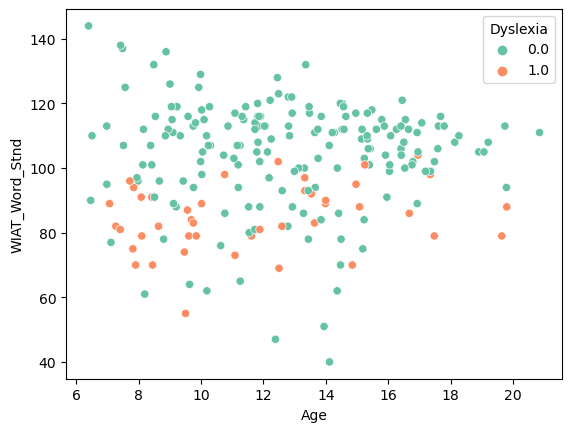

In [9]:
sns.scatterplot(data=big_df, x='Age', y='WIAT_Word_Stnd', hue='Dyslexia', palette="Set2")

<AxesSubplot:xlabel='Age', ylabel='WIAT_Word_Raw'>

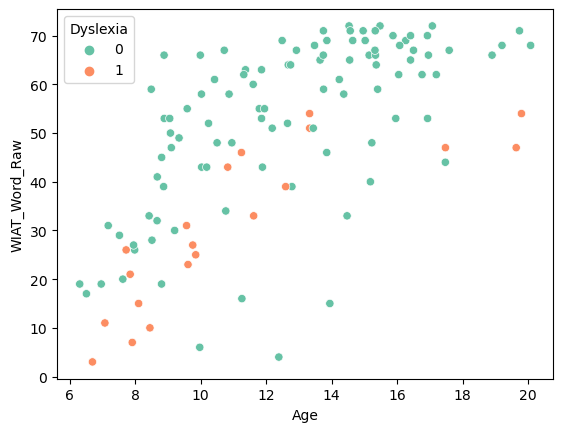

In [30]:
sns.scatterplot(data=big_df, x='Age', y='WIAT_Word_Raw', hue='Dyslexia', palette="Set2")

<AxesSubplot:xlabel='Age', ylabel='WIAT_Word_Stnd'>

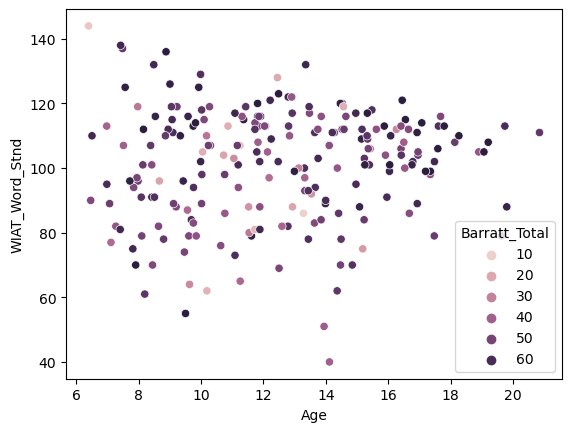

In [25]:
sns.scatterplot(data=big_df, x='Age', y='WIAT_Word_Stnd', hue='Barratt_Total')

<AxesSubplot:xlabel='TOWRE_Total_Scaled', ylabel='WIAT_Word_Stnd'>

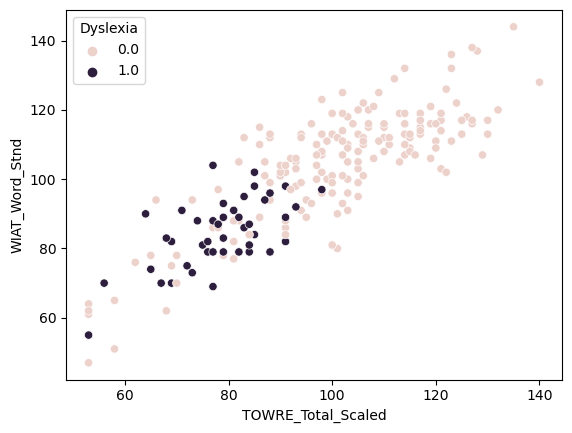

In [26]:
sns.scatterplot(data=big_df, x='TOWRE_Total_Scaled', y='WIAT_Word_Stnd', hue='Dyslexia')

<AxesSubplot:xlabel='TOWRE_Total_Scaled', ylabel='WIAT_Word_Stnd'>

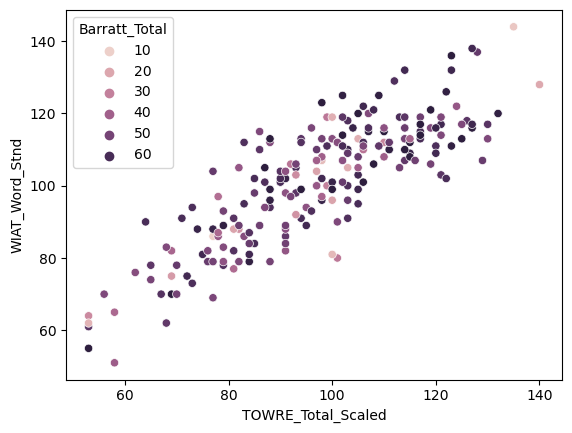

In [27]:
sns.scatterplot(data=big_df, x='TOWRE_Total_Scaled', y='WIAT_Word_Stnd', hue='Barratt_Total')

<AxesSubplot:xlabel='meanFD_avg', ylabel='meanFD_movieDM'>

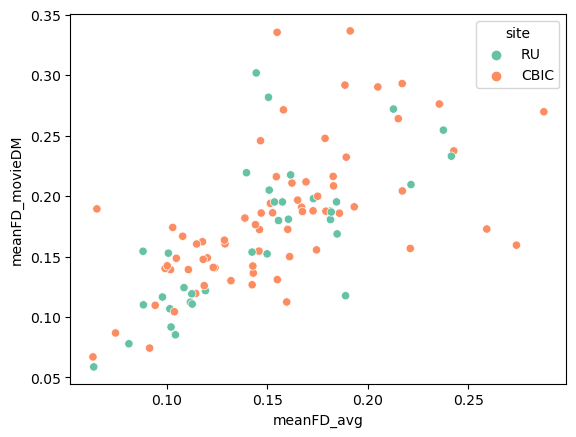

In [19]:
sns.scatterplot(data=big_df, x='meanFD_avg', y='meanFD_movieDM', hue='site', palette="Set2")

Right handed: 136
Left handed: 25


(array([ 11.,   2.,   4.,   2.,   5.,   2.,  14.,  24.,  44., 116.]),
 array([-1.00050000e+02, -8.00400000e+01, -6.00300000e+01, -4.00200000e+01,
        -2.00100000e+01, -1.42108547e-14,  2.00100000e+01,  4.00200000e+01,
         6.00300000e+01,  8.00400000e+01,  1.00050000e+02]),
 <BarContainer object of 10 artists>)

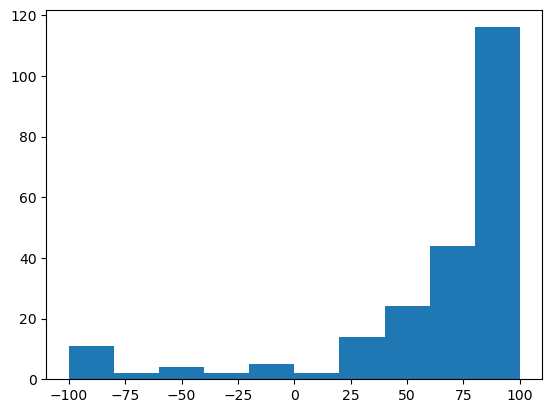

In [29]:
#handedness
ehq_thresh = 70
right_data = big_df.loc[sub_data['EHQ_Total']>ehq_thresh]
print('Right handed: ' + str(len(right_data)))
left_data = big_df.loc[sub_data['EHQ_Total']<=0]
print('Left handed: ' + str(len(left_data)))
plt.hist(big_df['EHQ_Total'])

In [30]:
print('Participants with Dyslexia: ' + str(len(right_data[right_data['Dyslexia']==1])))
print('Participants with Acalculia: ' + str(len(right_data[right_data['Acalculia']==1])))
print('Participants with Both: ' + str(len(right_data.query('Dyslexia==1 and Acalculia==1'))))
print('Participants with ADHD: ' + str(len(right_data[right_data['ADHD']==1])))
print('Participants with Dys+ADHD: ' + str(len(right_data.query('Dyslexia==1 and ADHD==1'))))

Participants with Dyslexia: 23
Participants with Acalculia: 14
Participants with Both: 8
Participants with ADHD: 72
Participants with Dys+ADHD: 17


Text(118.0, 0.08793234352555693, 'r = -0.182\np = 0.006')

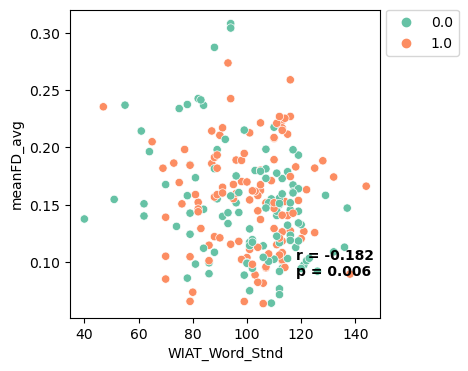

In [32]:
##### Scatterplots of pairs of variables
plot_data = big_df
var1 = 'WIAT_Word_Stnd'
var2 = 'meanFD_avg'

fig,ax=plt.subplots(figsize=(4, 4), nrows=1, ncols=1)
sns.scatterplot(data=plot_data, x=var1, y=var2, hue='ADHD', palette="Set2",ax=ax)
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# filter non-nans
plot_data=plot_data.loc[~plot_data[var1].isna() & ~plot_data[var2].isna()]

cor_val, p_val = stats.pearsonr(plot_data[var1],plot_data[var2])

xrange = np.max(plot_data[var1]) - np.min(plot_data[var1])
xpos = np.max(plot_data[var1]) - 0.25 * xrange
yrange = np.max(plot_data[var2]) - np.min(plot_data[var2])
ypos = np.max(plot_data[var2]) - 0.9 * yrange
ax.text(xpos, ypos, "r = {:.3f}\np = {:.3f}".format(cor_val,p_val), horizontalalignment='left', size='medium', weight='semibold')

In [34]:
# Try syntax to drop NAs- this will drop based on ANY NA in a row
subframe=plot_data.dropna()
rval,pval = stats.pearsonr(subframe[var1],subframe[var2])
print(rval)
print(pval)
print(len(subframe))

-0.12935703138039845
0.35120285717924904
54


<AxesSubplot:xlabel='Age', ylabel='WIAT_Word_Stnd'>

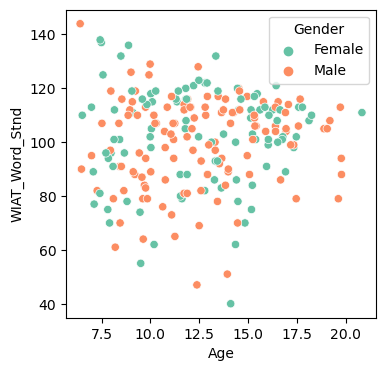

In [35]:
fig,ax=plt.subplots(figsize=(4, 4), nrows=1, ncols=1)
sns.scatterplot(data=my_data, x='Age', y='WIAT_Word_Stnd', hue='Gender', palette="Set2")

224


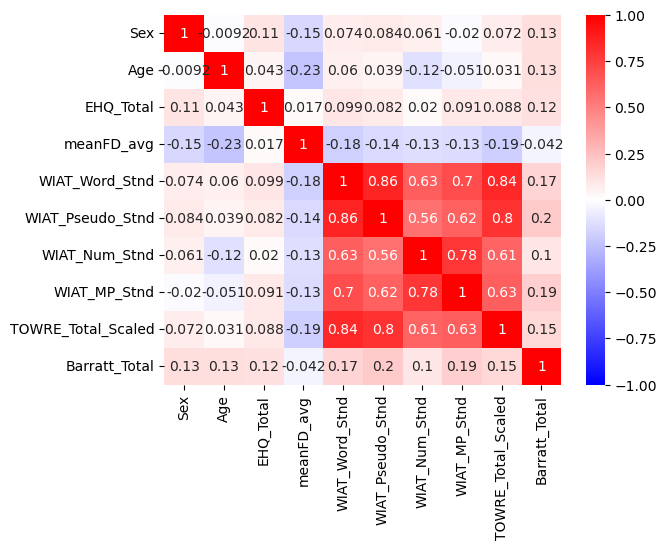

In [21]:
temp_df = sub_data[['Sex', 'Age', 'EHQ_Total','meanFD_avg',
                       'WIAT_Word_Stnd','WIAT_Pseudo_Stnd','WIAT_Num_Stnd', 'WIAT_MP_Stnd','TOWRE_Total_Scaled', 'Barratt_Total']]
corrmat = temp_df.corr()
#corrmat.style.background_gradient(cmap='coolwarm') # This is another nice way to plot the correlation matrix
#but the seaborn way is prettier
sns.heatmap(corrmat,cmap='bwr',annot=True,cbar=True, center = 0,vmin=-1, vmax=1)
print(len(temp_df))

116


<AxesSubplot:>

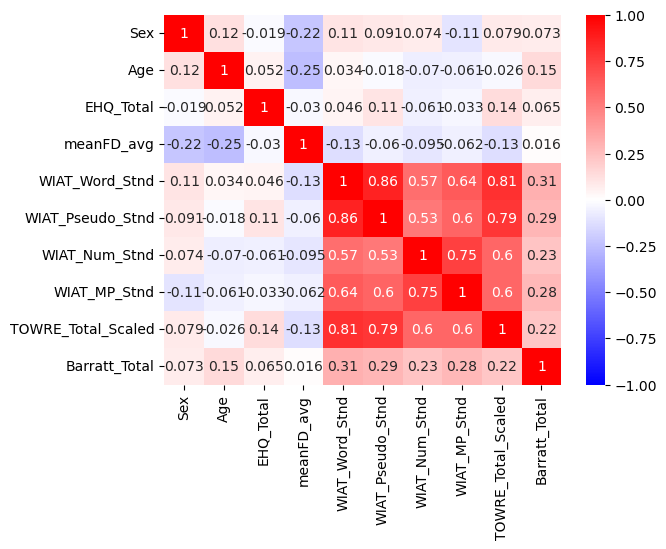

In [40]:
rh_df= temp_df[temp_df['EHQ_Total']>80]
print(len(rh_df))
corrmat_1 = rh_df.corr()
sns.heatmap(corrmat_1,cmap='bwr',annot=True,cbar=True, center = 0,vmin=-1, vmax=1)

<AxesSubplot:xlabel='Age', ylabel='EHQ_Total'>

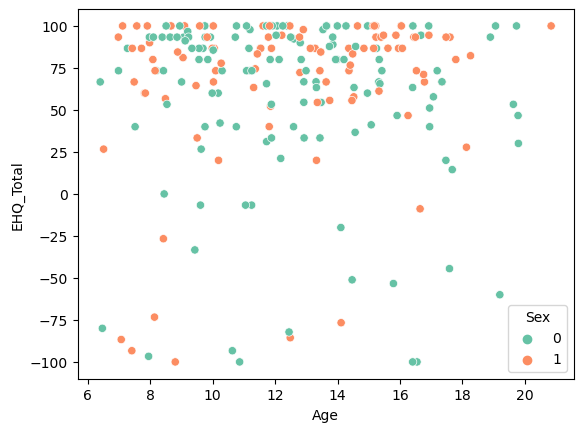

In [32]:
sns.scatterplot(data=sub_data, x='Age', y='EHQ_Total', hue='Sex', palette="Set2")

In [33]:
rh_df.describe()

,Sex,Age,EHQ_Total,meanFD_avg,WIAT_Word_Stnd,WIAT_Pseudo_Stnd,WIAT_Num_Stnd,WIAT_MP_Stnd,TOWRE_Total_Scaled,Barratt_Total
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,135.000000,134.000000
mean,0.492647,12.402897,89.665809,0.151562,100.529412,97.566176,98.007353,95.875000,97.177778,52.705224
std,0.501794,3.155849,9.172086,0.044703,16.500928,16.788313,17.382621,18.725082,17.168118,12.036944
min,0.000000,6.980492,71.170000,0.063834,47.000000,47.000000,57.000000,46.000000,53.000000,9.500000
25%,0.000000,9.758755,83.380000,0.115236,89.000000,89.750000,87.000000,84.000000,85.500000,46.875000
50%,0.000000,12.172826,93.380000,0.151593,104.000000,100.000000,98.000000,97.000000,98.000000,56.250000
75%,1.000000,14.875313,100.050000,0.182834,113.000000,109.000000,109.250000,110.000000,109.500000,61.000000
max,1.000000,20.841775,100.050000,0.308272,138.000000,128.000000,155.000000,136.000000,130.000000,66.000000


<AxesSubplot:>

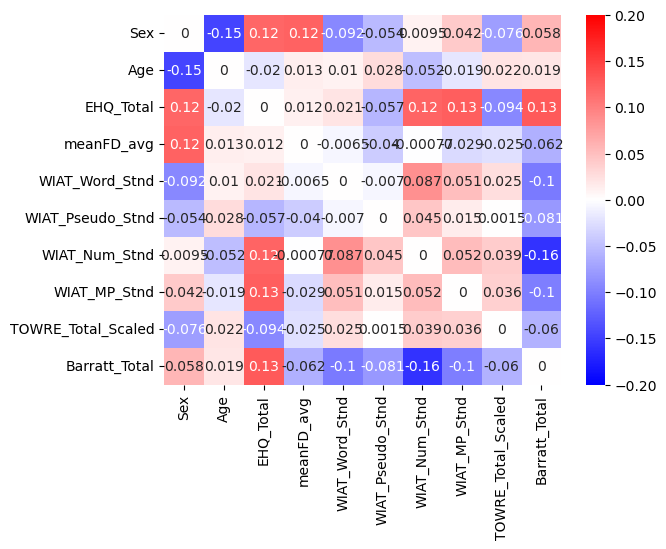

In [37]:
# Look at the differences between all data and only right handed
test = corrmat-corrmat_1
sns.heatmap(test,cmap='bwr',vmin=-0.2,vmax=0.2,center =0,annot=True,cbar=True)

### Play with LME on behavioral data

In [27]:
# Couldnt install pymer4- need to define r_home as it is trying to run R things
# from pymer4.models import Lmer
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
md = smf.mixedlm("WIAT_Word_Stnd ~ 1 + Age * Barratt_Total", sub_data, groups=sub_data["participant_id"],missing='drop')
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: WIAT_Word_Stnd
No. Observations:   219     Method:             REML          
No. Groups:         219     Scale:              145.5055      
Min. group size:    1       Log-Likelihood:     -933.0513     
Max. group size:    1       Converged:          Yes           
Mean group size:    1.0                                       
--------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025  0.975]
--------------------------------------------------------------
Intercept         101.527   15.275  6.646 0.000 71.588 131.466
Age                -1.031    0.975 -1.058 0.290 -2.942   0.880
Barratt_Total      -0.050    0.308 -0.162 0.871 -0.655   0.555
Age:Barratt_Total   0.023    0.021  1.119 0.263 -0.017   0.063
Group Var         145.506                                     



/home/groups/jyeatman/software/mayay/anaconda3/envs/FC/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [32]:
md = smf.mixedlm("WIAT_Word_Stnd ~ 1 + Age + EHQ_Total", sub_data, groups=sub_data["participant_id"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: WIAT_Word_Stnd
No. Observations: 224     Method:             REML          
No. Groups:       224     Scale:              152.0957      
Min. group size:  1       Log-Likelihood:     -958.5905     
Max. group size:  1       Converged:          Yes           
Mean group size:  1.0                                       
-------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept     94.928     2.296  41.339  0.000  90.427  99.429
Age            0.295     0.040   7.441  0.000   0.217   0.372
EHQ_Total      0.034     0.024   1.447  0.148  -0.012   0.081
Group Var    152.096                                         



/home/groups/jyeatman/software/mayay/anaconda3/envs/FC/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [40]:
#This doesnt work on Sherlock becasue it needs to have R_HOME defined
!pip install -q pymer4

    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6knfmhkr/rpy2_425a904393cc4271a9705d35fba88634/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6knfmhkr/rpy2_425a904393cc4271a9705d35fba88634/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-3njmfjd5
         cwd: /tmp/pip-install-6knfmhkr/rpy2_425a904393cc4271a9705d35fba88634/
    Complete output (2 lines):
    Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
    ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlo

    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6knfmhkr/rpy2_6c4882987d1e44c6b47547c761cf67aa/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6knfmhkr/rpy2_6c4882987d1e44c6b47547c761cf67aa/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-v26fq0fw
         cwd: /tmp/pip-install-6knfmhkr/rpy2_6c4882987d1e44c6b47547c761cf67aa/
    Complete output (2 lines):
    Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
    ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlo

    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6knfmhkr/rpy2_1478c310127a42dfbc39359d3deafa76/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6knfmhkr/rpy2_1478c310127a42dfbc39359d3deafa76/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-ikazxnup
         cwd: /tmp/pip-install-6knfmhkr/rpy2_1478c310127a42dfbc39359d3deafa76/
    Complete output (2 lines):
    Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
    cffi mode: CFFI_MODE.ANY
    -----------

    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6knfmhkr/rpy2_3750fd858f5c43d0a7f35b370ff09c82/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6knfmhkr/rpy2_3750fd858f5c43d0a7f35b370ff09c82/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-m82r8ffx
         cwd: /tmp/pip-install-6knfmhkr/rpy2_3750fd858f5c43d0a7f35b370ff09c82/
    Complete output (1 lines):
    There is no R_HOME and the R executable cannot be found.
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin

In [2]:
# This also doesn't work on Sherlock
!apt-get install r-base
!pip install -q rpy2

 There's no apt-get on Sherlock
 For more information about software on Sherlock,
 please see https://www.sherlock.stanford.edu/docs/software
 or contact srcc-support@stanford.edu.
------------------------------------------------------------
    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_7t7j0zz/rpy2_e9d8d6f66db14229bdc04da2c60a5158/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_7t7j0zz/rpy2_e9d8d6f66db14229bdc04da2c60a5158/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-h4um9dwc
         cwd: /tmp/pip-install-_7t7j0zz/rpy2_e9d8d6f66db14229bdc04da2c60a5158/
    Comple

    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_7t7j0zz/rpy2_14382f52623244a2b31e0c5de18f5006/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_7t7j0zz/rpy2_14382f52623244a2b31e0c5de18f5006/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-5awaoryl
         cwd: /tmp/pip-install-_7t7j0zz/rpy2_14382f52623244a2b31e0c5de18f5006/
    Complete output (2 lines):
    Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
    ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlo

    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_7t7j0zz/rpy2_3904c491f5a144f69319011dfd3d9670/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_7t7j0zz/rpy2_3904c491f5a144f69319011dfd3d9670/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-r4ihit2b
         cwd: /tmp/pip-install-_7t7j0zz/rpy2_3904c491f5a144f69319011dfd3d9670/
    Complete output (2 lines):
    Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
    cffi mode: CFFI_MODE.ANY
    -----------

    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_7t7j0zz/rpy2_52085f817daa43729ccdb9e30b81d2b0/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_7t7j0zz/rpy2_52085f817daa43729ccdb9e30b81d2b0/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-w0jz1bja
         cwd: /tmp/pip-install-_7t7j0zz/rpy2_52085f817daa43729ccdb9e30b81d2b0/
    Complete output (1 lines):
    There is no R_HOME and the R executable cannot be found.
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin

    ERROR: Command errored out with exit status 1:
     command: /home/groups/jyeatman/software/mayay/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_7t7j0zz/rpy2_8973ea26479549e59e52d48a0087de48/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_7t7j0zz/rpy2_8973ea26479549e59e52d48a0087de48/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-_j_pzg1e
         cwd: /tmp/pip-install-_7t7j0zz/rpy2_8973ea26479549e59e52d48a0087de48/
    Complete output (15 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-_7t7j0zz/rpy2_8973ea26479549e59e52d48a0087de48/setup.py", line 102, in <module>
        c_extension_status = 